# 高维数据可视化

## 1.调用库和模块

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris    # 鸢尾花数据
from sklearn.decomposition import PCA

## 2.提取数据集

In [3]:
iris = load_iris()

In [4]:
y = iris.target
X = iris.data

In [9]:
X.shape

(150, 4)

## 3.建模

In [11]:
# 实例化，降维到2个特征
pca = PCA(n_components = 2)

# 拟合模型
pca = pca.fit(X)

# 获取新矩阵
X_dr = pca.transform(X)

In [13]:
X_dr

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

## 4.可视化

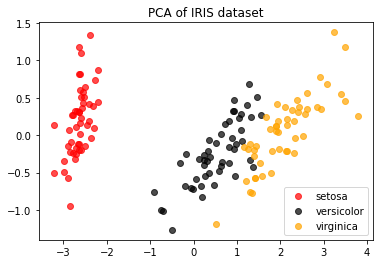

In [17]:
# 每种鸢尾花在图上的颜色
colors = ['red', 'black', 'orange']

# 鸢尾花的标签名字(为列表形式)
iris.target_names

plt.figure()

for i in range(3):
    plt.scatter(X_dr[y == i, 0]
                ,X_dr[y == i, 1]
                ,alpha = 0.7
                ,c = colors[i]
                ,label = iris.target_names[i]
    )
    
plt.legend()

plt.title("PCA of IRIS dataset")

plt.show()

## 5.探索降维后的数据

In [18]:
# 可解释性方差：降维后每个新特征向量上所带的信息量的大小
pca.explained_variance_

array([4.22824171, 0.24267075])

In [19]:
# 可解释性方差贡献率：降维后每个新特征向量所带的信息量占原始数据总信息量的百分比
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [20]:
# 计算降维后的两个特征所带的信息量占原始数据总信息量的大小
pca.explained_variance_ratio_.sum()

0.9776852063187949

## 6.累计可解释方差贡献率曲线

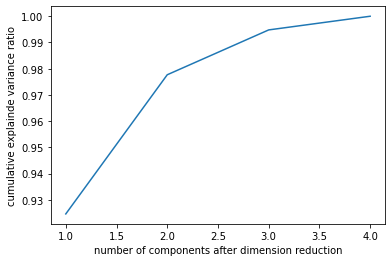

In [24]:
# 当参数n_components中不填任何值时，默认返回min(X.shape)，样本量或是特征总数较小的那个
pca_line = PCA().fit(X)

plt.plot(range(1,5), np.cumsum(pca_line.explained_variance_ratio_))

plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explainde variance ratio")

plt.show()

In [23]:
np.cumsum(pca_line.explained_variance_ratio_)

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

## 7.最大似然估计选超参数

In [25]:
pca_mle = PCA(n_components = "mle")
pca_mle = pca_mle.fit(X)
X_mle = pca_mle.transform(X)

In [26]:
X_mle

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [28]:
pca_mle.explained_variance_ratio_.sum()

0.9947878161267246

## 8.按信息量占比选超参数

In [29]:
# 自动选出能够让保留的信息量超过97%的特征数量
pca_f = PCA(n_components = 0.97, svd_solver = "full")
pca_f = pca_f.fit(X)
X_f = pca_f.transform(X)

In [30]:
pca_f.explained_variance_ratio_.sum()

0.9776852063187949